In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor as rf

In [11]:
#additionalData2 = pd.read_csv("D:\MS Data Analytics\Data Mining And Data Analysis\Project\\d4825f5e-5b50-458b-b75d-aff372248840_Data.csv")
additionalData= pd.read_csv("D:\MS Data Analytics\Data Mining And Data Analysis\Project\implutedAdditionalData.csv")

In [21]:
import re 
tempStr=[re.sub("\s|_|'|","",x) for x in additionalData.columns]
additionalData.rename(index=str, columns=dict(zip(additionalData.columns,tempStr)),inplace=True)
'''tempStr=[re.sub("\s|_|'|","",x) for x in additionalData2.columns]
additionalData2.rename(index=str, columns=dict(zip(additionalData2.columns,tempStr)),inplace=True)'''

In [23]:
additionalData.rename(index=str, columns=dict(zip(additionalData.columns[4:],[x[0:4] for x in additionalData.columns[4:]])),inplace=True)
#additionalData2.rename(index=str, columns=dict(zip(additionalData2.columns[4:],[x[0:4] for x in additionalData2.columns[4:]])),inplace=True)

In [18]:
additionalData.replace("..",np.nan,inplace=True)
#additionalData2.replace("..",np.nan,inplace=True)

In [138]:
def imputer(columns,location):
    temp=[]
    temp2=[]
    x=columns
    y=additionalData.loc[location].values[4:]


    #for inclusion of nan values
    for i in range(0,x.size):
        temp.append([x[i],y[i]])
   # print(temp)
   #for exclusion of nan values
    temp2= [[y,v] for y,v in temp if not(np.isnan(float(v)))]
    #print(temp2)
    if((len(temp)!=len(temp2)) and (len(temp)!=0)):
        if(np.isnan(float(temp[0][1]))):
            temp= rdFCurveFitting(temp,temp2)
            #print("RF")
        else:
            temp=interpolator(temp)
            #print("CF", temp)
    return temp

In [139]:
def interpolator(temp):
    series =pd.Series([float(x[1]) for x in temp])
    series.interpolate(method ="linear",limit= (len(temp)-10), inplace=True)
    return (series.values)

In [140]:
def rdFCurveFitting(temp, temp2):
    rfImputer = rf(random_state=0)
    if(len(temp2)!=0):
        rfImputer.fit(np.array([int(x[0]) for x in temp2]).reshape(-1,1),[float(x[1]) for x in temp2])
        temp3=rfImputer.predict(np.array([y for y,v in temp if np.isnan(float(v))]).reshape(-1,1))
        i=0
        for j in range(0,len(temp)):
            if(np.isnan(float(temp[j][1]))):
                temp[j][1]=temp3[i]
                i=i+1
    return [v for y,v in temp]



In [141]:
tp={}
for i in range(0, additionalData.shape[0]):
    additionalData.loc[additionalData.index[i]][4:]=imputer(additionalData.columns[4:], additionalData.index[i])

In [97]:
for i in range(0, additionalData.shape[0]):
    additionalData.loc[additionalData.index[i]][4:]=tp[i]

In [145]:
additionalData.to_csv("D:\MS Data Analytics\Data Mining And Data Analysis\Project\implutedAdditionalData.csv",encoding='utf-8')

In [5]:
additionalData

,Unnamed: 0,SeriesName,SeriesCode,CountryName,CountryCode,1968,1969,1970,1971,1972,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,1.946902e+10
1,1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,1.957422e+09,1.957422e+09,1.957422e+09,1.957422e+09,1.957422e+09,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,1.175815e+10
2,2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,3.852116e+09,4.257219e+09,4.863487e+09,5.077222e+09,6.761786e+09,...,1.710007e+11,1.372110e+11,1.612073e+11,2.000191e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658743e+11,1.590491e+11,1.590491e+11
3,3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,5.179000e+08,5.179000e+08,5.179000e+08,5.179000e+08,5.179000e+08,...,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08,6.518000e+08
4,4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,8.425623e+07,8.425623e+07,7.861921e+07,8.940982e+07,1.134082e+08,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,2.835004e+09
5,5,GDP (current US$),NY.GDP.MKTP.CD,Angola,AGO,7.018717e+09,7.018717e+09,7.018717e+09,7.018717e+09,7.018717e+09,...,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,1.000047e+11
6,6,GDP (current US$),NY.GDP.MKTP.CD,Antigua and Barbuda,ATG,8.273158e+07,8.273158e+07,8.273158e+07,8.273158e+07,8.273158e+07,...,1.368431e+09,1.224253e+09,1.152469e+09,1.142043e+09,1.211412e+09,1.192925e+09,1.280133e+09,1.364863e+09,1.460145e+09,1.404031e+09
7,7,GDP (current US$),NY.GDP.MKTP.CD,Argentina,ARG,2.643686e+10,3.125628e+10,3.158421e+10,3.329320e+10,3.473300e+10,...,3.615580e+11,3.329765e+11,4.236274e+11,5.301633e+11,5.459824e+11,5.520251e+11,5.263197e+11,5.847115e+11,5.454761e+11,5.454761e+11
8,8,GDP (current US$),NY.GDP.MKTP.CD,Armenia,ARM,2.125008e+09,2.125008e+09,2.125008e+09,2.125008e+09,2.125008e+09,...,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.057230e+10,1.066654e+10
9,9,GDP (current US$),NY.GDP.MKTP.CD,Aruba,ABW,1.361788e+09,1.361788e+09,1.361788e+09,1.361788e+09,1.361788e+09,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,2.540883e+09,2.540883e+09,2.540883e+09,2.540883e+09,2.540883e+09,2.540883e+09


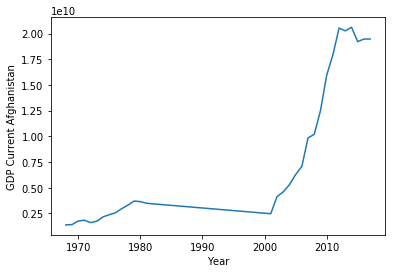

In [42]:
"""pyplot.plot(additionalData.columns[5:],additionalData.loc[0].values[5:])
pyplot.ylabel('GDP Current Afghanistan')
pyplot.xlabel("Year")
pyplot.show()"""

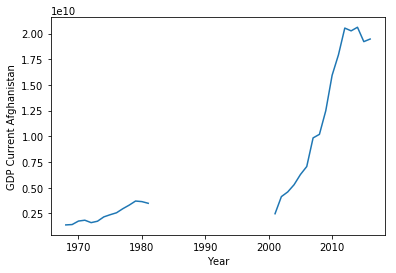

In [43]:
"""pyplot.plot(additionalData2.columns[4:],additionalData2.loc["0"].values[4:])
pyplot.ylabel('GDP Current Afghanistan')
pyplot.xlabel("Year")
pyplot.show()"""